In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dir = '/content/drive/My Drive/YEAR 3/TERM 2/DATASCI/Healthsites'

In [4]:
# Read shapefile
ph = gpd.read_file(dir + '/gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."


In [5]:
# Read GeoJSON file
healthsites = gpd.read_file(dir + '/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,,,,6fb6d5acfc8841b9a093117a94750833,,,,,,,1.0,,2017-03-03T08:20:18,,,,MedCore,,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,,,,d658390a61644ef4a3197d66adf2ee8f,,,,,,,1.0,,2019-05-21T22:03:08,,,,City Health Office - Iligan City,,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,,,+6378 3020000;+6378 3043789;+6378 304 1410;+63...,d6b4acf850ac4a66a8331aa8fde2c9f1,,24/7,,,,,1.0,,2020-02-22T13:37:54,,,Tuguegarao,Cagayan Valley Medical Center,,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,,,,c95ed8224a844508b7e2539345b8d7a3,,Mo-Su 07:00-22:00,,,,,4.0,,2020-06-08T05:58:39,,,,Mercury Drug,,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,,,,38170810204c4c2bb7753171ab92e186,,,,,,,1.0,yes,2018-06-25T10:54:52,,,,Se単or Santo Ni単o Hospital,,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


In [6]:
cala_ph = ph[ph.NAME_1.isin(["Laguna", "Cavite"])]
cala_healthsites = gpd.sjoin(healthsites, cala_ph, op='within')
laguna_healthsites = cala_healthsites[cala_healthsites['NAME_1'] == 'Laguna']
cavite_healthsites = cala_healthsites[cala_healthsites['NAME_1'] == 'Cavite']

In [7]:
len(laguna_healthsites[laguna_healthsites['amenity'] == 'clinic'])

77

Amenities in Cavite:  437
Amenities in Laguna:  449
Total Amenities:  886


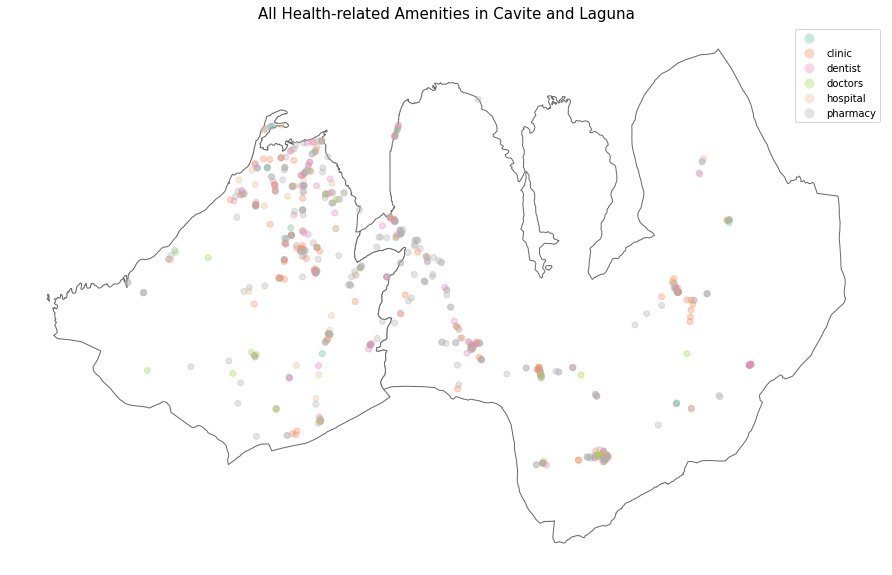

In [8]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

cala_ph.plot(ax=ax, color='white', edgecolor='dimgray')
cala_healthsites.plot(ax=ax, column="amenity", cmap="Set2", alpha=0.35, legend=True)
ax.set_title('All Health-related Amenities in Cavite and Laguna', fontsize=15)
ax.axis('off');

plt.savefig(dir + "/amenities.png")

print("Amenities in Cavite: ", len(cavite_healthsites))
print("Amenities in Laguna: ", len(laguna_healthsites))
print("Total Amenities: ", len(cala_healthsites))

Amenities in Cavite:  71
Amenities in Laguna:  77
Total Amenities:  148


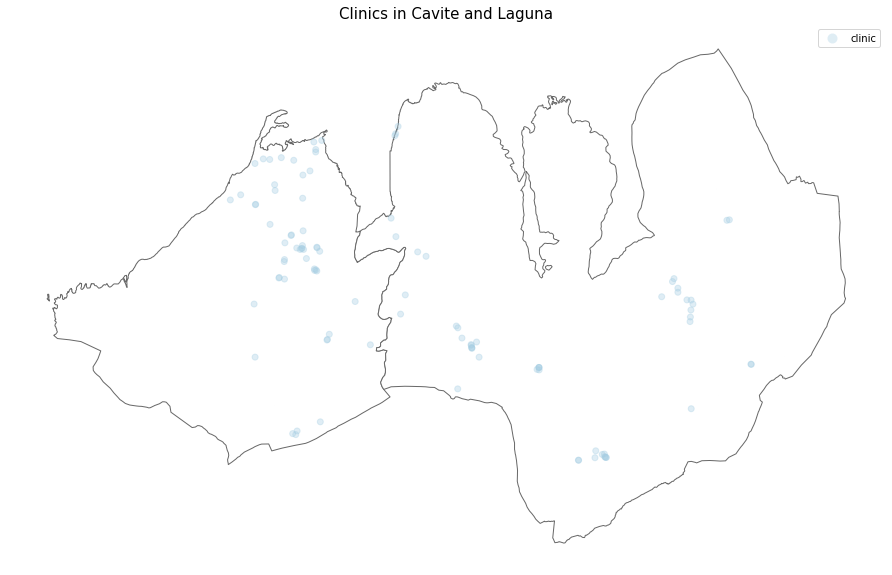

In [9]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

cala_ph.plot(ax=ax, color='white', edgecolor='dimgray')
cala_healthsites[cala_healthsites["amenity"] == "clinic"].plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Clinics in Cavite and Laguna', fontsize=15)
ax.axis('off');

print("Amenities in Cavite: ", len(cavite_healthsites[cavite_healthsites['amenity'] == 'clinic']))
print("Amenities in Laguna: ", len(laguna_healthsites[laguna_healthsites['amenity'] == 'clinic']))
print("Total Amenities: ", len(cala_healthsites[cala_healthsites['amenity'] == 'clinic']))

Amenities in Cavite:  49
Amenities in Laguna:  57
Total Amenities:  106


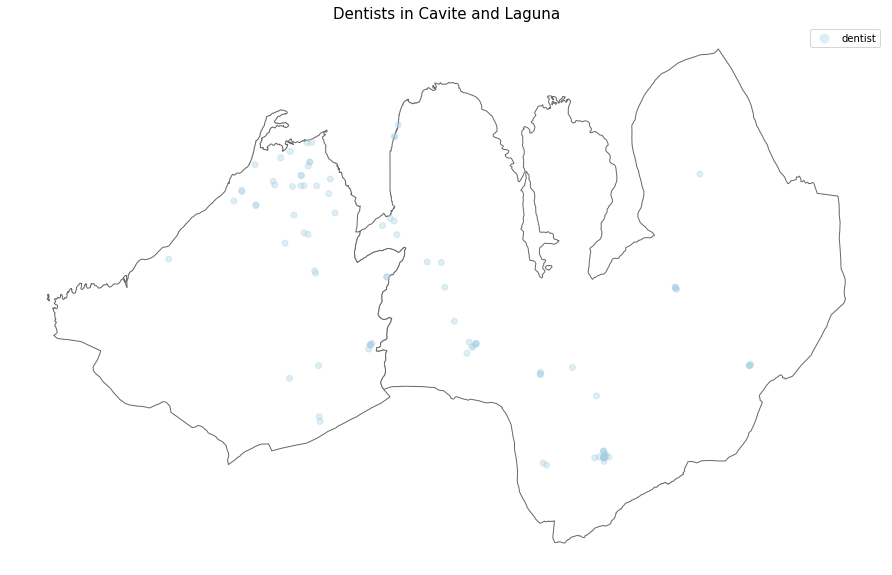

In [10]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

cala_ph.plot(ax=ax, color='white', edgecolor='dimgray')
cala_healthsites[cala_healthsites["amenity"] == "dentist"].plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Dentists in Cavite and Laguna', fontsize=15)
ax.axis('off');

print("Amenities in Cavite: ", len(cavite_healthsites[cavite_healthsites['amenity'] == 'dentist']))
print("Amenities in Laguna: ", len(laguna_healthsites[laguna_healthsites['amenity'] == 'dentist']))
print("Total Amenities: ", len(cala_healthsites[cala_healthsites['amenity'] == 'dentist']))

Amenities in Cavite:  15
Amenities in Laguna:  40
Total Amenities:  55


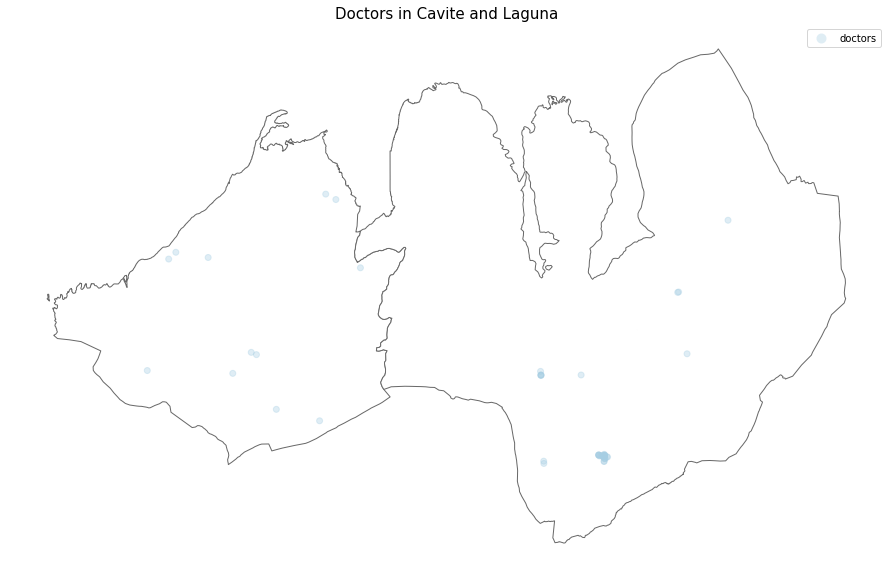

In [11]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

cala_ph.plot(ax=ax, color='white', edgecolor='dimgray')
cala_healthsites[cala_healthsites["amenity"] == "doctors"].plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Doctors in Cavite and Laguna', fontsize=15)
ax.axis('off');

print("Amenities in Cavite: ", len(cavite_healthsites[cavite_healthsites['amenity'] == 'doctors']))
print("Amenities in Laguna: ", len(laguna_healthsites[laguna_healthsites['amenity'] == 'doctors']))
print("Total Amenities: ", len(cala_healthsites[cala_healthsites['amenity'] == 'doctors']))

Amenities in Cavite:  92
Amenities in Laguna:  61
Total Amenities:  153


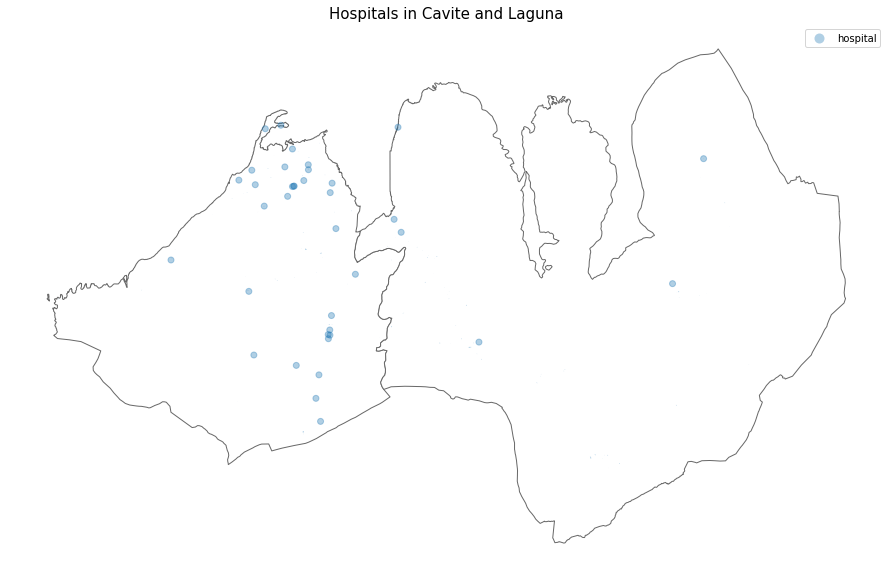

In [12]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

cala_ph.plot(ax=ax, color='white', edgecolor='dimgray')
cala_healthsites[cala_healthsites["amenity"] == "hospital"].plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Hospitals in Cavite and Laguna', fontsize=15)
ax.axis('off');

print("Amenities in Cavite: ", len(cavite_healthsites[cavite_healthsites['amenity'] == 'hospital']))
print("Amenities in Laguna: ", len(laguna_healthsites[laguna_healthsites['amenity'] == 'hospital']))
print("Total Amenities: ", len(cala_healthsites[cala_healthsites['amenity'] == 'hospital']))

Amenities in Cavite:  201
Amenities in Laguna:  204
Total Amenities:  405


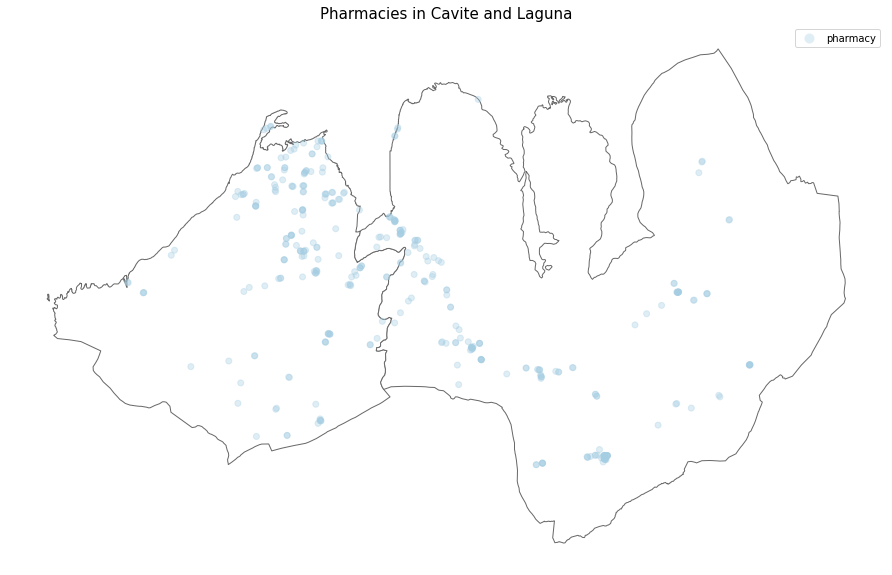

In [13]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

cala_ph.plot(ax=ax, color='white', edgecolor='dimgray')
cala_healthsites[cala_healthsites["amenity"] == "pharmacy"].plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Cavite and Laguna', fontsize=15)
ax.axis('off');

print("Amenities in Cavite: ", len(cavite_healthsites[cavite_healthsites['amenity'] == 'pharmacy']))
print("Amenities in Laguna: ", len(laguna_healthsites[laguna_healthsites['amenity'] == 'pharmacy']))
print("Total Amenities: ", len(cala_healthsites[cala_healthsites['amenity'] == 'pharmacy']))